# The Laplace Transform

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Properties

The Laplace transform has a number of specific properties which can be concluded directly from its definition. The most important ones in the context of signals and systems are reviewed in the following.

### Linearity

As can be concluded from its definition, the Laplace transform is a linear operation. For two signals $x_1(t)$ and $x_2(t)$ with Laplace transforms $X_1(s) = \mathcal{L} \{ x_1(t) \}$ and $X_2(s) = \mathcal{L} \{ x_2(t) \}$ the following holds

\begin{equation}
\mathcal{L} \{ A \cdot x_1(t) + B \cdot x_2(t) \} = A \cdot X_1(s) + B \cdot X_2(s)
\end{equation}

with $A, B \in \mathbb{C}$. The region of convergence (ROC) of the superposition $A x_1(t) + B x_2(t)$ is as least as large as the intersection of the ROCs of $x_1(t)$ and $x_2(t)$

\begin{equation}
\text{ROC} \{ A \cdot x_1(t) + B \cdot x_2(t) \} \supseteq \text{ROC} \{ x_1(t) \} \cap \text{ROC} \{ x_2(t) \}
\end{equation}

The Laplace transform of a weighted superposition of signals is equal to the weighted superposition of the individual Laplace transforms. This property is useful to derive the Laplace transform of signals that can be expressed as superposition of other signals for which the Laplace transforms are known or can be calculated easier.

#### Transformation of the cosine and sine signal

The Laplace transform of the causal cosine $\epsilon(t) \cdot \cos(\omega_0 t)$ and sine $\epsilon(t) \cdot \sin(\omega_0 t)$ signal is derived by expressing the cosine/sine as harmonic exponential signals using [Euler's formula](https://en.wikipedia.org/wiki/Euler's_formula)

\begin{align}
\cos(\omega_0 t) &= \frac{1}{2} \left( e^{j \omega_0 t} + e^{-j \omega_0 t} \right) \\
\sin(\omega_0 t) &= \frac{1}{2j} \left( e^{j \omega_0 t} - e^{-j \omega_0 t} \right)
\end{align}

The Laplace transform of the [causal complex exponential signal](definition.ipynb#Transformation-of-the-Causal-Complex-Exponential-Signal) reads

\begin{equation}
\mathcal{L} \{ \epsilon(t) \cdot e^{-s_0 t} \} = \frac{1}{s + s_0} \qquad \text{for } \Re \{ s \} > \Re \{ - s_0 \}
\end{equation}

Using the linearity of the Laplace transform yields

\begin{equation}
\mathcal{L} \{ \epsilon(t) \cdot \cos(\omega_0 t) \} = 
\frac{1}{2} \left( \frac{1}{s - j \omega_0} + \frac{1}{s + j \omega_0} \right) = \frac{s}{s^2 + \omega_0^2}
\qquad \text{for } \Re \{ s \} > 0
\end{equation}

and

\begin{equation}
\mathcal{L} \{ \epsilon(t) \cdot \sin(\omega_0 t) \} = 
\frac{1}{2j} \left( \frac{1}{s - j \omega_0} - \frac{1}{s + j \omega_0} \right) = \frac{\omega_0}{s^2 + \omega_0^2}
\qquad \text{for } \Re \{ s \} > 0
\end{equation}

**Example**

The Laplace transform of the causal cosine signal is calculated in `Sympy`

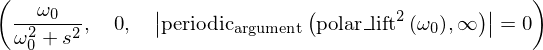

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, w0 = sym.symbols('t omega0', real=True)
s = sym.symbols('s', complex=True)

x = sym.sin(w0*t)
X, a, cond = sym.laplace_transform(x, t, s)
X, a, cond

**Exercise**

* Determine the zeros and poles of the Laplace transform $\mathcal{L} \{ \epsilon(t) \cdot \sin(\omega_0 t) \}$ by manual calculus and by extending above example. What specific symmetries do the zeros and poles show in the $s$-plane?

### Symmetry for Real-Valued Signals

The Laplace transform of the complex conjugate $x^*(t)$ of a signal $x(t)$ is given as

\begin{equation}
\mathcal{L} \{ x^*(t) \} = \int_{-\infty}^{\infty} x^*(t) \, e^{-s t} dt 
= \left( \int_{-\infty}^{\infty} x(t) \, e^{-s^* t} dt \right)^* 
= X^*(s^*)
\end{equation}

where $X(s) = \mathcal{L} \{ x(t) \}$. The ROC for $x^*(t)$ is equal to the ROC for $x(t)$. Above result is used to derive the Laplace transform of the real part of the signal $x(t)$

\begin{equation}
\mathcal{L} \left\{ \Re \{ x(t) \} \right\} = \mathcal{L} \left\{ \frac{1}{2} [ x(t) + x^*(t) ] \right\} = \frac{1}{2} \left[ X(s) + X^*(s^*) \right]
\end{equation}

and imaginary part

\begin{equation}
\mathcal{L} \left\{ \Im \{ x(t) \} \right\} = \mathcal{L} \left\{ \frac{1}{2j} [ x(t) - x^*(t) ] \right\} = \frac{1}{2j} \left[ X(s) - X^*(s^*) \right]
\end{equation}

For a real-valued signal $x(t) \in \mathbb{R}$ with $\Im \{ x(t) \} = 0$ it follows that

\begin{equation}
X(s) = X^*(s^*)
\end{equation}

It can be concluded, that the Laplace transform of a real valued signal shows complex conjugate symmetry. The real/imaginary part of the Laplace transform show even/odd symmetry

\begin{align}
\Re \{ X(s) \} &= \Re \{ X(-s) \} \\
\Im \{ X(s) \} &= - \Im \{ X(-s) \}
\end{align}

and accordingly its magnitude/phase show even/odd symmetry

\begin{align}
|X(s)| &= |X(-s)| \\
\varphi(s) &= - \varphi(-s)
\end{align}

where $\varphi(s) = \arg \{ H(s) \}$.

The poles and zeros of a [Laplace transform which can be expressed as a rational function](definition.ipynb#Representation) in $s$ 

\begin{equation}
X(s) = \frac{\sum_{m=0}^{M} \beta_m s^m}{\sum_{n=0}^{N} \alpha_n s^n} = K \cdot \frac{\prod_{\mu=0}^{Q} (s - s_{0 \mu})}{\prod_{\nu=0}^{P} (s - s_{\infty \nu})}
\end{equation}

with $Q=M-1$ and $P=N-1$ show also specific symmetries. From above condition for the Laplace transform of a real-valued signal $x(t) \in \mathbb{R}$, it can be concluded that the coefficients $\alpha_n, \beta_m$ of the numerator and denominator are real-valued. The [complex conjugate root theorem](https://en.wikipedia.org/wiki/Complex_conjugate_root_theorem) states that the roots of a polynomial with real valued coefficients are either real-valued or complex conjugate pairs. Hence, the zeros and poles of the Laplace transform $X(s)$ of a real-valued signal $x(t)$ are either real-valued or constitute complex conjugate pairs. 

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.